# Playing around with image display and manipulation
stough 202-

At this point you've already studied the [matplotlib tutorial](./NumpyAndVisualization/matplotlib_tutorial.ipynb). This is just meant to be a space to walk through some of your coding on image display and manipulation. Let's try some stuff out.

## Imports
Copy and paste into this notebook the imports from the [matplotlib tutorial](./NumpyAndVisualization/matplotlib_tutorial.ipynb). 

In [8]:
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# For importing from alternative directory sources
import sys  
sys.path.insert(0, '../dip_utils')

import matrix_utils

## Read an Image
Try loading `../dip_pics/sf.jpg` and reporting on its content using the `arr_info` function we've written. This image should be three channel with 8-bit color depth. That is, every pixel is represented by three numbers in the range $[0,255]$.

In [9]:
I = plt.imread('../dip_pics/yes.jpg')

## Display the Image
Again, use the [matplotlib tutorial](./NumpyAndVisualization/matplotlib_tutorial.ipynb) as guidance here and display the image.

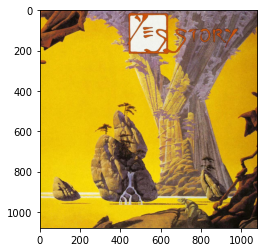

In [10]:
plt.figure(figsize=(4,4))
plt.imshow(I) # add semicolon ; to silense the printed output.

## Make the Image Brighter
Let's try to make the image brighter. If every number in the image is a `uint8`, what happens to the image if we just try `I50 = I + 50` for example?  

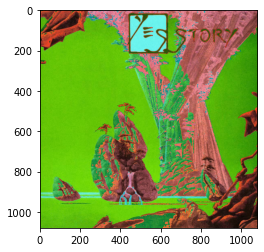

In [11]:
I = np.array(I)
I[...,0] = np.uint8(1.5*I[...,0])
I[...,0] = I[...,0] / np.max(I[...,0]) * 255
plt.figure(figsize=(4,4))
plt.imshow(I)

If it doesn't look right, then what happenned? Remember that the image is `uint8`. 

Try to correct the issue.

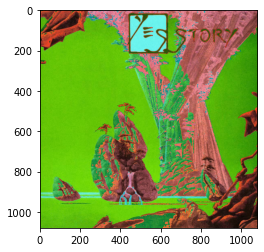

In [12]:
np.clip(I, 0, 255)
plt.figure(figsize=(4,4))
plt.imshow(I)

## Try Again with a Different Image
Try loading `../dip_pics/candy.png` and reporting on its content using the `arr_info` function we've written. You should see that the image information is quite different here. Try to make this image brighter.

In [13]:
matrix_utils.arr_info(I)

((1080, 1080, 3), dtype('uint8'), 0, 255)

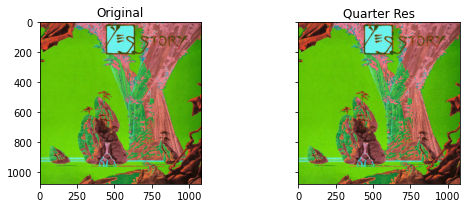

In [14]:
from skimage.transform import rescale

sI = rescale(I, .25, order=0, anti_aliasing=False, multichannel=True)

reI = rescale(sI, 4, order=0, anti_aliasing=False, multichannel=True)

f, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(8, 3))

ax[0].imshow(I, interpolation=None)
ax[0].set_title('Original')

ax[1].imshow(reI, interpolation=None)
ax[1].set_title('Quarter Res')

plt.tight_layout()
plt.show()